# Importing the libraries for data preprocessing and data loading

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pylab as plt

# Data loading
### Here dataset(kddcup) is loaded into our system using Pandas which was in csv format. The column names were assigned manually.

In [2]:
df = pd.read_csv('D:\\major project\\kddcup.data\\hi.csv',header=None,names=["duration: continuous.",'protocol_type: symbolic.','service: symbolic.','flag: symbolic.','src_bytes: continuous.','dst_bytes: continuous.','land: symbolic.','wrong_fragment: continuous.','urgent: continuous.','hot: continuous.','num_failed_logins: continuous.','logged_in: symbolic.','num_compromised: continuous.','root_shell: continuous.','su_attempted: continuous.','num_root: continuous.','num_file_creations: continuous.','num_shells: continuous.','num_access_files: continuous.','num_outbound_cmds: continuous.','is_host_login: symbolic.','is_guest_login: symbolic.','count: continuous.','srv_count: continuous.','serror_rate: continuous.','srv_serror_rate: continuous.','rerror_rate: continuous.','srv_rerror_rate: continuous.','same_srv_rate: continuous.','diff_srv_rate: continuous.','srv_diff_host_rate: continuous.','dst_host_count: continuous.','dst_host_srv_count: continuous.','dst_host_same_srv_rate: continuous.','dst_host_diff_srv_rate: continuous.','dst_host_same_src_port_rate: continuous.','dst_host_srv_diff_host_rate: continuous.','dst_host_serror_rate: continuous.','dst_host_srv_serror_rate: continuous.','dst_host_rerror_rate: continuous.','dst_host_srv_rerror_rate: continuous.','Result'])

### Let's explore the data to see the shape of our data frame and the no of different type of attacks in our dataset.

In [4]:
df.shape

(4898431, 42)

In [5]:
df.Result.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: Result, dtype: int64

### We see if there are any missing values in our columns

In [6]:
missing_values = df.isna()
missing_values.sum()

duration: continuous.                       0
protocol_type: symbolic.                    0
service: symbolic.                          0
flag: symbolic.                             0
src_bytes: continuous.                      0
dst_bytes: continuous.                      0
land: symbolic.                             0
wrong_fragment: continuous.                 0
urgent: continuous.                         0
hot: continuous.                            0
num_failed_logins: continuous.              0
logged_in: symbolic.                        0
num_compromised: continuous.                0
root_shell: continuous.                     0
su_attempted: continuous.                   0
num_root: continuous.                       0
num_file_creations: continuous.             0
num_shells: continuous.                     0
num_access_files: continuous.               0
num_outbound_cmds: continuous.              0
is_host_login: symbolic.                    0
is_guest_login: symbolic.         

### We delete the duplicate data 

In [8]:
df1 = df.drop_duplicates()
df1

,duration: continuous.,protocol_type: symbolic.,service: symbolic.,flag: symbolic.,src_bytes: continuous.,dst_bytes: continuous.,land: symbolic.,wrong_fragment: continuous.,urgent: continuous.,hot: continuous.,...,dst_host_srv_count: continuous.,dst_host_same_srv_rate: continuous.,dst_host_diff_srv_rate: continuous.,dst_host_same_src_port_rate: continuous.,dst_host_srv_diff_host_rate: continuous.,dst_host_serror_rate: continuous.,dst_host_srv_serror_rate: continuous.,dst_host_rerror_rate: continuous.,dst_host_srv_rerror_rate: continuous.,Result
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,255,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,255,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,255,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.


### As we can see above the number of rows reduced from 4898431 to 1074992. We deleted 3823439 duplicate network traffics.

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074992 entries, 0 to 4898430
Data columns (total 42 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   duration: continuous.                     1074992 non-null  int64  
 1   protocol_type: symbolic.                  1074992 non-null  object 
 2   service: symbolic.                        1074992 non-null  object 
 3   flag: symbolic.                           1074992 non-null  object 
 4   src_bytes: continuous.                    1074992 non-null  int64  
 5   dst_bytes: continuous.                    1074992 non-null  int64  
 6   land: symbolic.                           1074992 non-null  int64  
 7   wrong_fragment: continuous.               1074992 non-null  int64  
 8   urgent: continuous.                       1074992 non-null  int64  
 9   hot: continuous.                          1074992 non-null  int64  
 10  num_fa

### Since the dataframe contains both categorical and numerical values. We convert the numerical all values to float and we also convert categorical values to numerical values.

In [12]:
   #Dropping the labels to a different dataset which is used to train the Random Forest Classifier
df_X = df1.drop(df1.columns[41],axis=1,inplace = False)
df_Y = df1.drop(df1.columns[0:41],axis=1, inplace = False)


    # Convert Categorial data to the numerical data for the efficient classification
     ## Here We convert the columns ('protocol_type: symbolic.','service: symbolic.','flag: symbolic.' ) to numeric data 
df_X[df_X.columns[1:4]] = df_X[df_X.columns[1:4]].stack().rank(method='dense').unstack()
    
    # Converting input data columns value to float values

df_X = df_X.loc[:,df_X.columns[0:41]].astype(float)
df_X

#     # Normal is "1 0" and the abnormal is "0 1"
# df_Y.columns = ["y1"]
# df_Y.loc[:,('y2')] = df_Y['y1'] ==0
# df_Y.loc[:,('y2')] = df_Y['y2'].astype(int)

,duration: continuous.,protocol_type: symbolic.,service: symbolic.,flag: symbolic.,src_bytes: continuous.,dst_bytes: continuous.,land: symbolic.,wrong_fragment: continuous.,urgent: continuous.,hot: continuous.,...,dst_host_count: continuous.,dst_host_srv_count: continuous.,dst_host_same_srv_rate: continuous.,dst_host_diff_srv_rate: continuous.,dst_host_same_src_port_rate: continuous.,dst_host_srv_diff_host_rate: continuous.,dst_host_serror_rate: continuous.,dst_host_srv_serror_rate: continuous.,dst_host_rerror_rate: continuous.,dst_host_srv_rerror_rate: continuous.
0,0.0,73.0,36.0,11.0,215.0,45076.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0
1,0.0,73.0,36.0,11.0,162.0,4528.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0
2,0.0,73.0,36.0,11.0,236.0,1228.0,0.0,0.0,0.0,0.0,...,2.0,2.0,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0
3,0.0,73.0,36.0,11.0,233.0,2032.0,0.0,0.0,0.0,0.0,...,3.0,3.0,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0
4,0.0,73.0,36.0,11.0,239.0,486.0,0.0,0.0,0.0,0.0,...,4.0,4.0,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0.0,73.0,36.0,11.0,212.0,2288.0,0.0,0.0,0.0,0.0,...,3.0,255.0,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0
4898427,0.0,73.0,36.0,11.0,219.0,236.0,0.0,0.0,0.0,0.0,...,4.0,255.0,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0
4898428,0.0,73.0,36.0,11.0,218.0,3610.0,0.0,0.0,0.0,0.0,...,5.0,255.0,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0
4898429,0.0,73.0,36.0,11.0,219.0,1234.0,0.0,0.0,0.0,0.0,...,6.0,255.0,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0


## Converting the Result label to numerical data 

In [17]:
a = []
for i in df_Y.loc[:,'Result']:
    if(i=='normal.'):
        i=0
        a.append(i)
        
    else:
        i=1
        a.append(i)
df_Y.loc[:,'Result']=a 
df_Y.Result.value_counts()  # This gives the number of normal traffic and the attack traffic

# Normal is '0' and attack is '1'
    


0    812814
1    262178
Name: Result, dtype: int64

In [18]:
df_Yf = df_Y.drop(df_Y.columns[1:7],axis=1,inplace=False)

print(df_Yf)

         Result
0             0
1             0
2             0
3             0
4             0
...         ...
4898426       0
4898427       0
4898428       0
4898429       0
4898430       0

[1074992 rows x 1 columns]


In [19]:
df_Yf.columns = ["y1"]
df_Yf.loc[:,('y2')] = df_Yf['y1'] ==0
df_Yf.loc[:,('y2')] = df_Yf['y2'].astype(int)
df_Yf

,y1,y2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
4898426,0,1
4898427,0,1
4898428,0,1
4898429,0,1


## Now finally We train our Random Forest Classifier 
### Here we are using Random Forest Classifier only for feature selection to calculate the importance of the features and sort them according to their importance.
## The feature imporatance is calculated using teh formula below in our Random Classifier Model
## ni = N_T/N[Gini−{ (N_T_R/N_T)×Right−Gini}−{ (N_T_L/N_T)×Left−Gini}]
# f_ik  = (sum of ni of all k trees)/(sum of all nodes of all k trees)
 


 


In [20]:
labels = np.array(df_Yf).astype(int)
inputX = np.array(df_X)
    
    #Random Forest Model
model = RandomForestClassifier(random_state = 0)
model.fit(inputX,labels)
importances = model.feature_importances_
    
    
 

In [21]:
print(importances)

[1.65335655e-03 1.10062850e-02 5.58712146e-03 8.60978096e-02
 9.28555891e-02 2.66201731e-02 4.15795893e-06 2.72040698e-03
 4.88249444e-06 1.26173462e-03 4.93530800e-05 1.68860964e-02
 1.23234942e-03 1.85519232e-05 3.26450407e-06 6.08300136e-05
 2.86522777e-05 9.08117060e-06 1.00524853e-05 0.00000000e+00
 8.63971185e-08 1.16934697e-04 1.12008206e-01 5.63076235e-03
 1.52606442e-02 4.02295924e-02 4.52083866e-03 4.29931070e-03
 2.20560712e-01 1.21946599e-01 1.71885449e-03 1.61228132e-02
 3.73283177e-02 1.86093184e-02 2.15327633e-02 2.35652081e-02
 9.70575337e-03 4.71179816e-02 4.62742378e-02 2.77370663e-03
 4.56761099e-03]


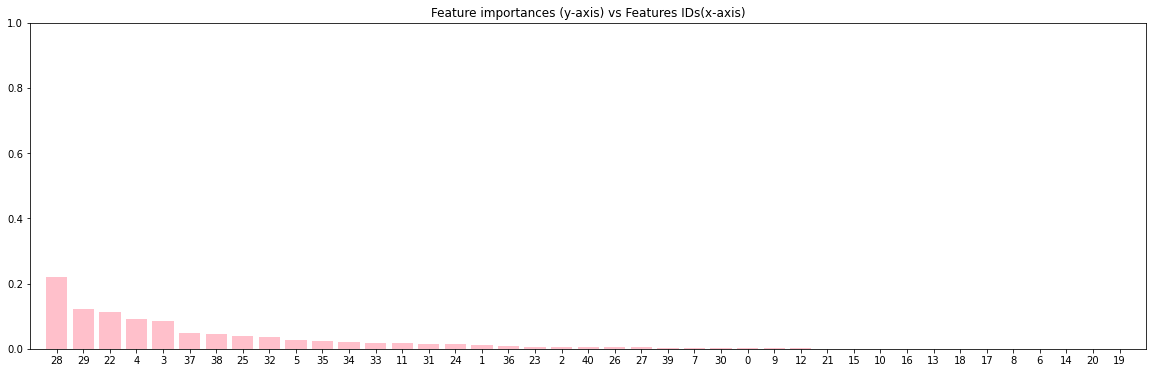

         same_srv_rate: continuous.  diff_srv_rate: continuous.  \
0                               1.0                         0.0   
1                               1.0                         0.0   
2                               1.0                         0.0   
3                               1.0                         0.0   
4                               1.0                         0.0   
...                             ...                         ...   
4898426                         1.0                         0.0   
4898427                         1.0                         0.0   
4898428                         1.0                         0.0   
4898429                         1.0                         0.0   
4898430                         1.0                         0.0   

         count: continuous.  src_bytes: continuous.  flag: symbolic.  \
0                       1.0                   215.0             11.0   
1                       2.0                   162.0

In [35]:
   #Plotting the Features agains their importance scores
indices = np.argsort(importances)[::-1]
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
plt.figure(figsize = (20,6))
plt.title("Feature importances (y-axis) vs Features IDs(x-axis)")
plt.bar(range(inputX.shape[1]), importances[indices],color="pink", align="center")
plt.xticks(range(inputX.shape[1]), indices)
plt.xlim([-1, inputX.shape[1]])
plt.ylim([0,1])
plt.show()
    
    # Selecting top featueres which have higher importance values = here we can find "12" features
    #as we can see in the next step
newX = df_X.iloc[:,model.feature_importances_.argsort()[::-1][:12]]
print(newX)

In [30]:
print(indices)

[28 29 22  4  3 37 38 25 32  5 35 34 33 11 31 24  1 36 23  2 40 26 27 39
  7 30  0  9 12 21 15 10 16 13 18 17  8  6 14 20 19]
